# Parkinsons Disease Detection Using Machine Learning Models

- By S.Abishek 
- AP19110010087 CSE D

>Dataset - https://archive.ics.uci.edu/ml/datasets/parkinsons

### Dataset Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

### Attribute Information:

`
 Name - ASCII subject name and recording number
 MDVP:Fo(Hz) - Average vocal fundamental frequency
 MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
 MDVP:Flo(Hz) - Minimum vocal fundamental frequency
 MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
 MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
 NHR,HNR - Two measures of ratio of noise to tonal components in the voice
 status - Health status of the subject (one) - Parkinson's, (zero) - healthy
 RPDE,D2 - Two nonlinear dynamical complexity measures
 DFA - Signal fractal scaling exponent
 spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation `

## Importing Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

### Data Collection - Reading Dataset

In [2]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv("parkinsons.csv")


In [3]:
# printing the first 5 rows of the dataframe
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
df.shape

(195, 24)

### Check for Missing Data

In [6]:
# Prints a concise summary of the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# Checking for missing values in each column
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Explanatory Data Analysis

Statistical measures

In [8]:
# Getting some statistical measures about the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


With the help of describe we can know how the data is divded and the range of values within their percentages.

#### Distribution of Target Variable

The target variable is Status

In [9]:
# Distribution of target Variable.
target_count = df['status'].value_counts()
print(target_count)

1    147
0     48
Name: status, dtype: int64


1  --> Parkinson's Positive

0 --> Healthy

1    75.384615
0    24.615385
Name: status, dtype: float64


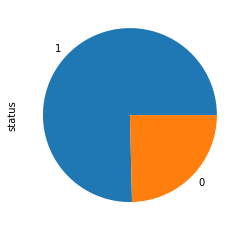

In [10]:
# Plotting for the target_count
target_count.plot.pie()
# Finding the percentage of the column status - target variable
percent = (target_count / len(df))*100
print(percent)

Finding mean for the Status column

In [11]:
# grouping the data based on the target variable
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


From grouping we can find the major difference in attribute values between healthy people and people effected with parkinsons.

### Heatmap to see how the independent variables are correalted with the target

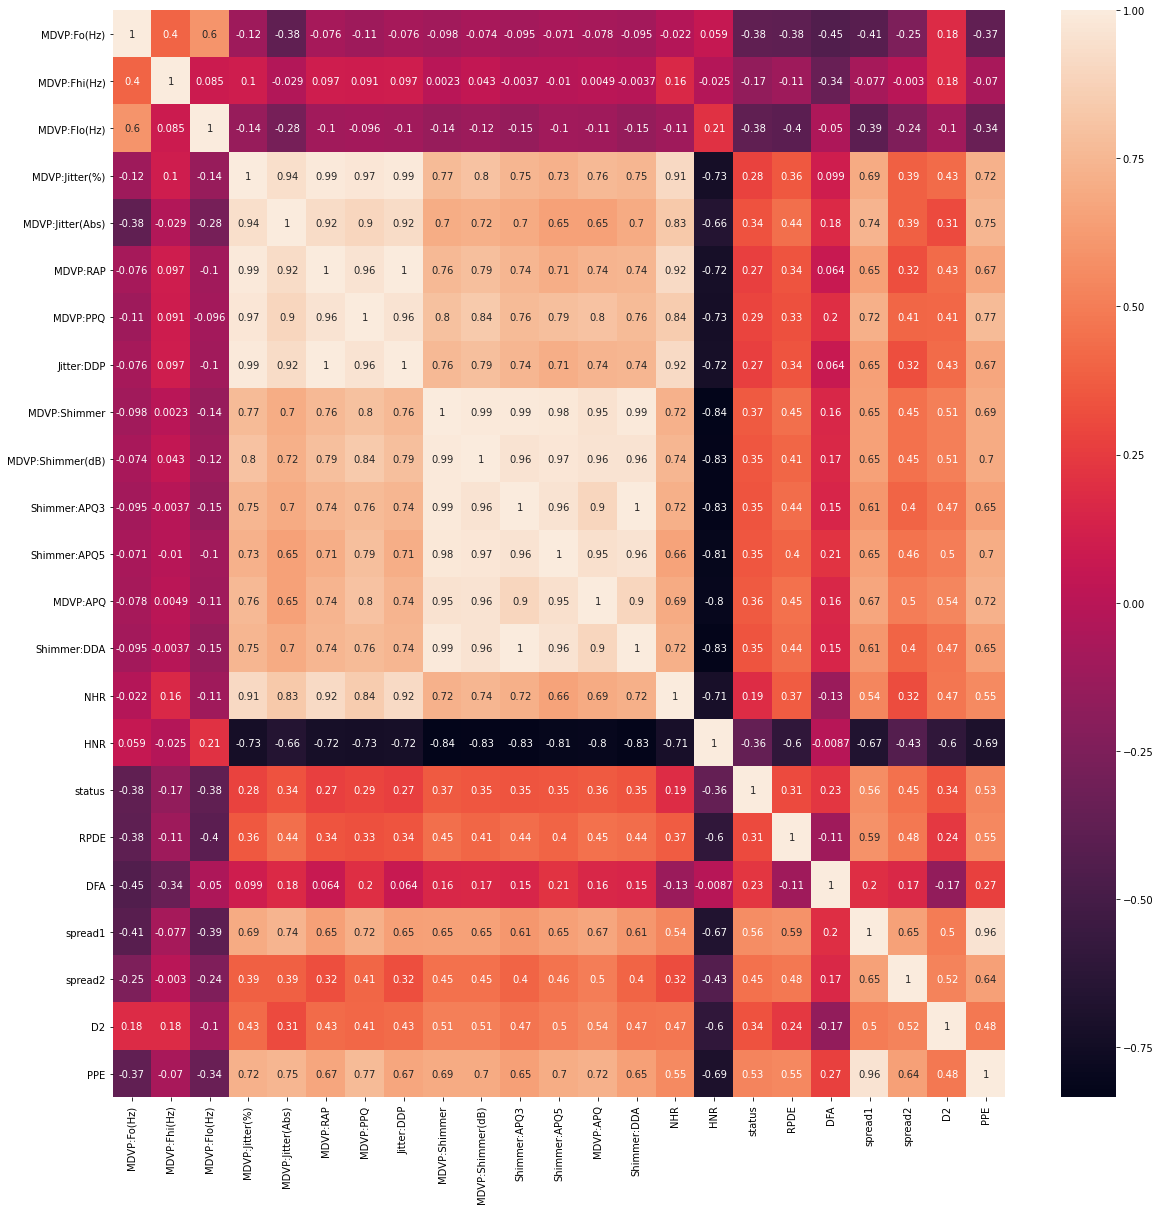

In [12]:
plt.figure(figsize=(20, 20))
p = sn.heatmap(df.corr(), annot=True)

## Data Preprocessing

### Handling categorical values

Seperating Other variables and Target Variables

In [13]:
# Dropping name column as it is not required
x = df.drop(columns=['name','status'], axis=1) 
#target values
y = df['status']

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

### Data Standardization

As the values in the table are so different in range we can scale them in the range 1 to -1

Feature scaling is a method used to standardize the range of independent variables or features of data.
Since the range of values of raw data varies widely, in some machine learning algorithms, 
objective functions will not work properly without normalization. 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Standardising the data
stdscaler = StandardScaler()
x = np.array(stdscaler.fit_transform(x))
x

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

### Splitting the dataset

Split the Feature set (X) and Target set (y) into training set (X_train, y_train) and testing set (X_test,y_test)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Splitting to training and testing data (80% training 20% testing)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(156, 22)
(39, 22)
(156,)
(39,)


Converting the values into numpy arrays

In [19]:
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
len(Y_test)

39

## Model Training

There are 5 steps in model training
1. Importing the model
2. Training or Fitting the model
3. Predicting the model
4. Finding its Accuracy
5. Visualising the Test set - HEATMAP

## 1. Linear Regression

In [20]:
#importing 
from sklearn.linear_model import LinearRegression

In [21]:
#fitting the model
model1 = LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [22]:
#predicting the model
Y_predmod1=model1.predict(X_test)
Y_predmod1

array([0.51464502, 0.92291805, 1.08895196, 0.93072429, 0.39722818,
       0.96450257, 0.51665718, 0.73428536, 0.96425774, 0.89648295,
       0.54933081, 1.04009737, 1.02683814, 1.02090193, 0.52986194,
       0.21476581, 1.07171961, 0.93419406, 0.55144217, 0.87538823,
       1.17667136, 0.53241189, 0.40486539, 0.77032915, 0.94973256,
       0.79196182, 0.95604616, 1.05056541, 0.02141046, 0.08635714,
       0.86404109, 0.73424635, 1.07673007, 0.16402396, 0.26651789,
       0.70248981, 0.5602687 , 0.96492844, 0.09659312])

We cannot find accuracy with these decimal values as The status prediction should be 0 or 1.

Now we convert these values into Binary

In [23]:
# Converting the above values to binary to find accuracy
for i,j in enumerate(Y_predmod1):
    if(j<0.5):
        Y_predmod1[i]=0
    else:
        Y_predmod1[i]=1
print(Y_predmod1)
print("")
print(Y_test)
print(Y_test.shape)

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.]

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]
(39,)


In [24]:
print("X_test Y_test")
for i,j in zip(Y_predmod1,Y_test):
    print(i,"   ",j)

X_test Y_test
1.0     1
1.0     1
1.0     1
1.0     1
0.0     0
1.0     1
1.0     0
1.0     1
1.0     1
1.0     1
1.0     1
1.0     1
1.0     1
1.0     1
1.0     1
0.0     0
1.0     1
1.0     1
1.0     1
1.0     1
1.0     1
1.0     0
0.0     0
1.0     1
1.0     1
1.0     1
1.0     1
1.0     1
0.0     0
0.0     0
1.0     1
1.0     1
1.0     1
0.0     0
0.0     0
1.0     1
1.0     0
1.0     1
0.0     0


In [25]:
#Finding Accuracy
Acc1 = model1.score(X_test,Y_test)*100
print("Linear Regression Accuracy:",Acc1)

Linear Regression Accuracy: 66.34994862741931


Finding Coefficients and Intercept of Linear Regression

In [26]:
print("Coefficients are ",model1.coef_)
print("\nIntercept are",model1.intercept_)


Coefficients are  [-1.04534118e-01 -8.64109626e-03 -8.47479945e-02 -8.42742504e-01
 -2.11212157e-01  1.56884203e+01 -1.42137550e-01 -1.46054643e+01
  5.17532503e-01  5.28230731e-02 -4.02387066e+01 -2.09417859e-01
 -7.79932356e-02  4.00157133e+01 -9.44810447e-02 -4.34151524e-02
 -8.18391150e-02  1.28448884e-02  7.56285161e-02  1.01698916e-01
  1.77072618e-02  1.60954993e-01]

Intercept are 0.7534122263490168


### Heatmap 

In [27]:
#evaluate the performance of algorithms, we used different metrics.
#Confusion matrix helps to find different Metrics
from sklearn.metrics import confusion_matrix

Text(24.0, 0.5, 'Truth')

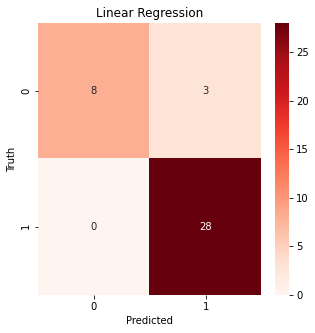

In [28]:
plt.rcParams['figure.figsize'] = [5,5]

cm=confusion_matrix(Y_test,Y_predmod1)
plt.title("Linear Regression")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")


## 2. Logistic Regression

In [29]:
#importing 
from sklearn.linear_model import LogisticRegression

In [30]:
#training or fitting
model2 = LogisticRegression()
model2.fit(X_train,Y_train)

LogisticRegression()

In [31]:
#predicting 
Y_predmod2 = model2.predict(X_test)
print(Y_predmod2)
print(Y_test)

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]
[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]


In [32]:
# Accuracy score on training data
Acc2 = model2.score(X_test,Y_test)*100
print("Logistic Regression Accuracy:",Acc2)

Logistic Regression Accuracy: 97.43589743589743


Some Probabities in Logistic Regression

In [33]:
model2.predict_proba(X_test)

array([[6.04302356e-02, 9.39569764e-01],
       [3.22125469e-03, 9.96778745e-01],
       [1.50254202e-03, 9.98497458e-01],
       [2.59753456e-02, 9.74024654e-01],
       [5.76189480e-01, 4.23810520e-01],
       [2.61914891e-03, 9.97380851e-01],
       [7.34636224e-01, 2.65363776e-01],
       [2.27997815e-02, 9.77200219e-01],
       [1.53787217e-01, 8.46212783e-01],
       [3.05365168e-03, 9.96946348e-01],
       [4.45622835e-01, 5.54377165e-01],
       [2.53908029e-02, 9.74609197e-01],
       [7.04228379e-02, 9.29577162e-01],
       [5.71461644e-02, 9.42853836e-01],
       [2.57962987e-01, 7.42037013e-01],
       [7.91088358e-01, 2.08911642e-01],
       [7.27540850e-03, 9.92724592e-01],
       [4.44811777e-02, 9.55518822e-01],
       [5.88103262e-01, 4.11896738e-01],
       [3.32999226e-03, 9.96670008e-01],
       [2.44702351e-04, 9.99755298e-01],
       [5.56339077e-01, 4.43660923e-01],
       [6.99562434e-01, 3.00437566e-01],
       [3.94903792e-02, 9.60509621e-01],
       [4.368836

Text(24.0, 0.5, 'Truth')

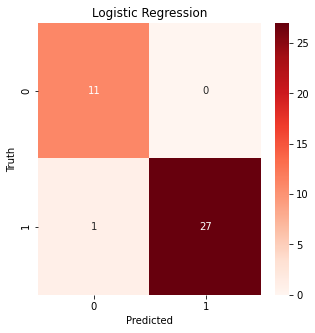

In [34]:
#Heatmap
cm=confusion_matrix(Y_test,Y_predmod2)
plt.title("Logistic Regression")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

## 3. Decision Tree

In [35]:
#importing
from sklearn import tree

In [36]:
#training
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train,Y_train)

DecisionTreeClassifier()

In [37]:
#Predictions
Y_predmod3=model3.predict(X_test)
print(Y_predmod3)
print(Y_test)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 0]
[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]


In [38]:
# Accuracy score on training data
Acc3 = model3.score(X_test,Y_test)*100
print("Decision Tree Accuracy:",Acc3)

Decision Tree Accuracy: 92.3076923076923


Text(24.0, 0.5, 'Truth')

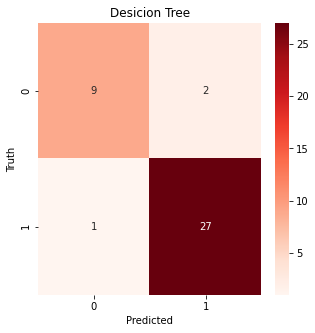

In [39]:
#Heatmap
cm=confusion_matrix(Y_test,Y_predmod3)
plt.title("Desicion Tree")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

## 4. Support Vector Machine 

In [40]:
#importing
from sklearn.svm import SVC

In [41]:
#training 
model4 = SVC(kernel='linear')
model4.fit(X_train,Y_train)

SVC(kernel='linear')

In [42]:
#predicting
Y_predmod4=model4.predict(X_test)
print(Y_predmod4)
print(Y_test)

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]
[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]


In [43]:
# Accuracy score on training data
Acc4 = model4.score(X_test,Y_test)*100
print("Support Vector Machine Accuracy",Acc4)

Support Vector Machine Accuracy 100.0


Text(24.0, 0.5, 'Truth')

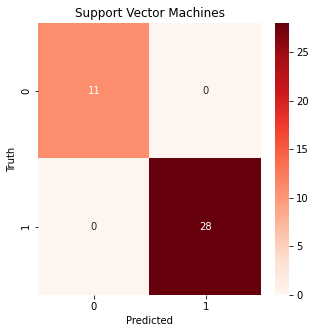

In [44]:
cm=confusion_matrix(Y_test,Y_predmod4)
plt.title("Support Vector Machines")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

## 5.XG boost

In [45]:
#importing
from xgboost import XGBClassifier

In [46]:
#training
model5 = XGBClassifier()
model5.fit(X_train,Y_train)


[13:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
Y_predmod5=model5.predict(X_test)
print(Y_predmod5)
print(Y_test)

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]
[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]


In [48]:
Acc5 = model5.score(X_test,Y_test)*100
print("XGB classifier Accuracy:",Acc5)

XGB classifier Accuracy: 100.0


Text(24.0, 0.5, 'Truth')

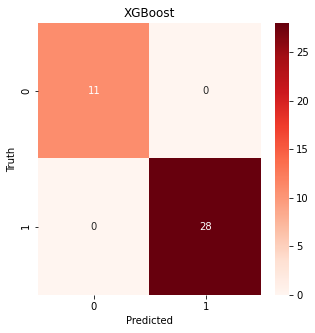

In [49]:
cm=confusion_matrix(Y_test,Y_predmod5)
plt.title("XGBoost")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

## 6.Random Forest 

In [50]:
#importing
from sklearn.ensemble import RandomForestClassifier

In [51]:
#training
model6 = RandomForestClassifier()
model6.fit(X_train,Y_train)

RandomForestClassifier()

In [52]:
Y_predmod6=model6.predict(X_test)
print(Y_predmod5)
print(Y_test)

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]
[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]


In [53]:
# Accuracy score on training data
Acc6 = model6.score(X_test,Y_test)*100
print("Random Forest Accuracy:",Acc6)

Random Forest Accuracy: 100.0


Text(24.0, 0.5, 'Truth')

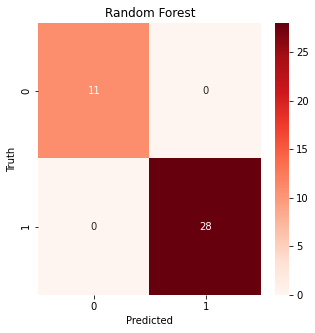

In [54]:
cm=confusion_matrix(Y_test,Y_predmod5)
plt.title("Random Forest")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Comparing accuracy for all the applied classifiers

In [55]:
names = ["Linear Regression","Logistic Regression","Decision Tree","Support Vector Machines","XGBoost","Random Forest"]
classifiers= [model1,model2,model3,model4,model5,model6]
accuracy = []
# Iterate over classifiers
for name, clf in zip(names,classifiers):
    clf.fit(X_train,Y_train)
    Acc = clf.score(X_test,Y_test)*100
    accuracy.append(Acc)

df1 = pd.DataFrame()
df1['Models'] = names
df1['Accuracy'] = accuracy
print(df1)

[13:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                    Models    Accuracy
0        Linear Regression   66.349949
1      Logistic Regression   97.435897
2            Decision Tree   94.871795
3  Support Vector Machines  100.000000
4                  XGBoost  100.000000
5            Random Forest   94.871795


In [56]:
df1

,Models,Accuracy
0,Linear Regression,66.349949
1,Logistic Regression,97.435897
2,Decision Tree,94.871795
3,Support Vector Machines,100.000000
4,XGBoost,100.000000
5,Random Forest,94.871795


### Get performance metrics for all the applied classifiers

### Evaluating the Performance of Classifiers

In [57]:
'''
from sklearn metrics and classification report we get the main metrics 
1.precision
2.accuracy
3.recall
4.f1 -score
'''
from sklearn.metrics import classification_report

In [64]:
# Classification Report of models
print("_________________________________________________________________________________")
print("Linear Regression Performance metrics\n",classification_report(Y_test,Y_predmod1))
print("_________________________________________________________________________________")
print("Logistic Regression Performance metrics\n",classification_report(Y_test,Y_predmod2))
print("_________________________________________________________________________________")
print("Desicion Tree Performance metrics\n",classification_report(Y_test,Y_predmod3))
print("_________________________________________________________________________________")
print("Support Vector Machines Performance metrics\n",classification_report(Y_test,Y_predmod4))
print("_________________________________________________________________________________")
print("XGBoost Performance metrics\n",classification_report(Y_test,Y_predmod5))
print("_________________________________________________________________________________")
print("Random Forest Performance metrics\n",classification_report(Y_test,Y_predmod6))
print("_________________________________________________________________________________")


_________________________________________________________________________________
Linear Regression Performance metrics
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.90      1.00      0.95        28

    accuracy                           0.92        39
   macro avg       0.95      0.86      0.90        39
weighted avg       0.93      0.92      0.92        39

_________________________________________________________________________________
Logistic Regression Performance metrics
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

_________________________________________________________________________________
Desicion Tree Perfor

### Comparing Confusion Matrices of Models

Text(781.1, 0.5, 'Truth')

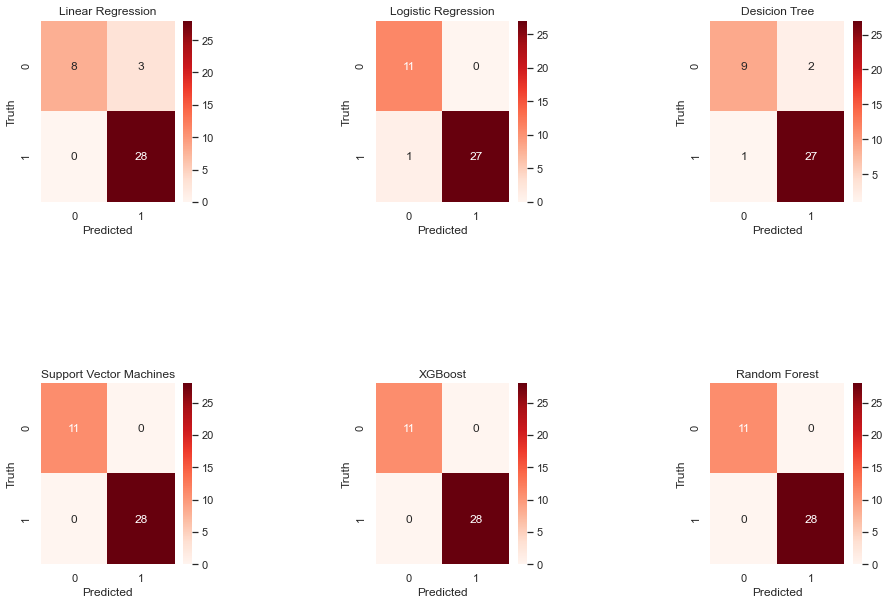

In [67]:
plt.rcParams['figure.figsize'] = [15,10]

plt.subplot(2,3,1)
cm=confusion_matrix(Y_test,Y_predmod1)
plt.title("Linear Regression")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

plt.subplots_adjust(wspace=1)

plt.subplot(2,3,2)
cm=confusion_matrix(Y_test,Y_predmod2)
plt.title("Logistic Regression")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

plt.subplots_adjust(wspace=1)

plt.subplot(2,3,3)
cm=confusion_matrix(Y_test,Y_predmod3)
plt.title("Desicion Tree")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

plt.subplots_adjust(hspace=1)

plt.subplot(2,3,4)
cm=confusion_matrix(Y_test,Y_predmod4)
plt.title("Support Vector Machines")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

plt.subplots_adjust(wspace=1)

plt.subplot(2,3,5)
cm=confusion_matrix(Y_test,Y_predmod5)
plt.title("XGBoost")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")


plt.subplots_adjust(wspace=1)

plt.subplot(2,3,6)
cm=confusion_matrix(Y_test,Y_predmod6)
plt.title("Random Forest")
fg=sn.heatmap(cm,annot=True,cmap='Reds')
figure = fg.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")

SVM and XG boost Classfiers have an accuracy of 100% which is great for a Machine Learning Model 
Logistic Regression and Random Forest model are so close to 100% accuracy


### Predictive System - Detection of Parkisons Disease in an Individual

We will now test our model taking some input data,for prediction we also need to check it against some input values given by the user.
Lets predict using our best models 
1. SVM 
2. XGB

>Case 1 : Input Values of Patient having Parkinson, let's see if the model is able to predict or not (USING SVM MODEL)

In [60]:
input_data = (95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571)

# changing input data to numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the numpy array 
input_data_reshape = input_data_numpy.reshape(1,-1)

#standardizing the input data 
std_data = stdscaler.transform(input_data_reshape)

## prediction using SVM model
prediction = model4.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The patient has Parkinson')
elif (prediction[0] == 0):
  print('The patient does not have Parkinson')
else:
  print('Invalid Entry')

[1]
The patient has Parkinson


> Case 2 : Input Values of Patient not having Parkinson, let's see if the model is able to predict or not (Using XG boost model)

In [61]:
#data of a healthy person
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
# changing input data to numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the numpy array 
input_data_reshape = input_data_numpy.reshape(1,-1)

#standardizing the input data 
std_data = stdscaler.transform(input_data_reshape)

## prediction using XG boost model
prediction = model5.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The patient has Parkinson')
elif (prediction[0] == 0):
  print('The patient does not have Parkinson')
else:
  print('Invalid Entry')

[0]
The patient does not have Parkinson


### Visually compare the performance of all classifiers

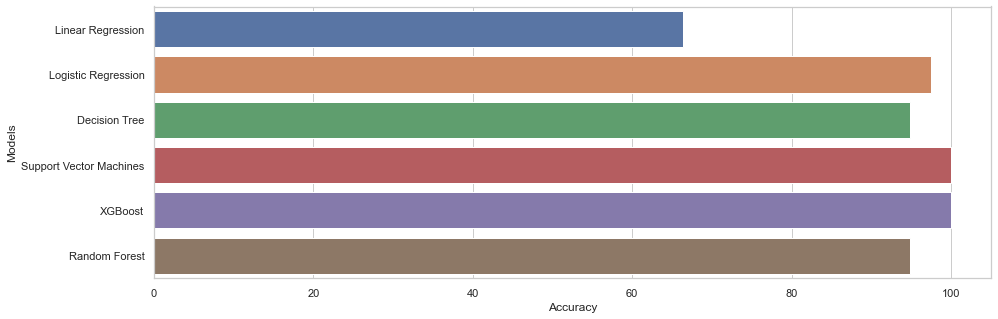

In [72]:
# Graphically represents the performance of the classification techniques based on their accuracy measures.
plt.rcParams['figure.figsize'] = 15,5
sn.set(style="whitegrid")
ax = sn.barplot(y="Models", x="Accuracy", data=df1)

### CONCLUSION:
After using these five classifiers the models Logistic Regression,Random Forest models of accuracy approximately 97% are good models. 

Decision tree and Linear regression are not recommended for training this dataset. 

With highest accuracy Support Vector Machine,XG boost of accuracy 100% gives best accurate results in detecting the Parkinson's Disease with the given input